<a href="https://colab.research.google.com/github/Redhoxx/VUT_ML/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import EarlyStopping

###################################

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


#### 1.2 Dataset examination

Using the following code, display random images,

In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

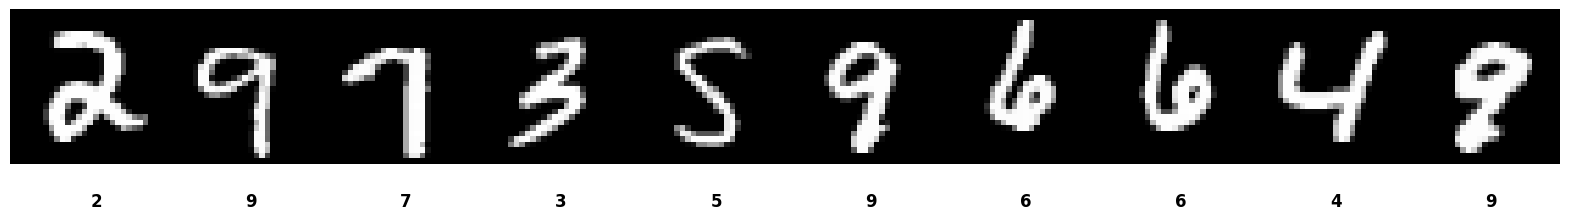

In [5]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?

The dataset are a set of labeled images of handwritten numbers.

- How many data samples do we have in train and test datasets?

There are 60000 in X_train and 10000 in X_test.

- How many colour channels does the input variable have?

Only one channel because of grayscale.

- What is the size of the input images?

Each image has a size of 28 by 28 pixels.

- What is the necessary preprocessing of the input data X?

Normalize pixel values to the range [0, 1] by dividing by 255.

- How many classes do we have in target variable?

There are 10 classes (from 0 to 9)

- What is the necessary preprocessing of target variable y?

Convert integer labels into a one-hot encoded format.

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [6]:
# Normalization
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [8]:
loss = 'categorical_crossentropy'
metrics = ['accuracy']
optimizer = Adam()

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [9]:
epochs = 10
batch_size = 128
validation_split = 0.2

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.8613 - loss: 0.4930 - val_accuracy: 0.9731 - val_loss: 0.0974
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.9756 - loss: 0.0861 - val_accuracy: 0.9795 - val_loss: 0.0697
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.9841 - loss: 0.0556 - val_accuracy: 0.9829 - val_loss: 0.0563
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.9881 - loss: 0.0403 - val_accuracy: 0.9850 - val_loss: 0.0527
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9835 - val_loss: 0.0578
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9848 - val_loss: 0.0544
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.9959 - loss: 0.0153 - val_accuracy: 0.9848 - val_loss: 0.0548
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9963 - loss: 0.0131 - 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

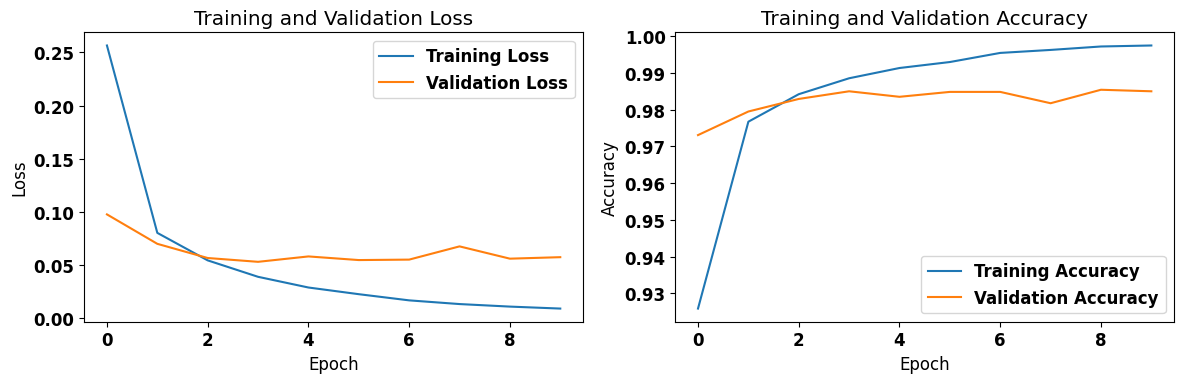

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

cr = classification_report(y_true, y_pred)

Test Loss: 0.0457
Test Accuracy: 0.9860
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [12]:
print(cm)

[[ 973    0    2    0    0    1    2    1    0    1]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   2    3 1009    5    1    0    0    9    3    0]
 [   0    0    0 1005    0    1    0    1    1    2]
 [   0    0    0    0  978    0    0    0    0    4]
 [   1    0    0    6    0  882    3    0    0    0]
 [   7    2    0    0    1    4  944    0    0    0]
 [   1    2    5    4    2    0    0 1006    1    7]
 [   3    0    3    6    4    2    1    1  946    8]
 [   0    1    0    3   13    2    0    6    0  984]]


In [13]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 5.1 Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# 5.2 Split the training data manually
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

datagen.fit(X_train_sub)  # Only fit on training data

# 5.3 Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5,
    verbose=1
)

# 5.4 Rebuild and compile the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 5.5 Fit the model using data augmentation
epochs = 30
batch_size = 128

train_generator = datagen.flow(X_train_sub, y_train_sub, batch_size=batch_size)

history_aug = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 159ms/step - accuracy: 0.6673 - loss: 1.7463 - val_accuracy: 0.9698 - val_loss: 0.3032 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 144ms/step - accuracy: 0.9128 - loss: 0.4685 - val_accuracy: 0.9693 - val_loss: 0.2778 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 136ms/step - accuracy: 0.9303 - loss: 0.3997 - val_accuracy: 0.9779 - val_loss: 0.2494 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 142ms/step - accuracy: 0.9404 - loss: 0.3678 - val_accuracy: 0.9803 - val_loss: 0.2327 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 142ms/step - accuracy: 0.9425 - loss: 0.3499 - val_accuracy: 0.9821 - val_loss: 0.2210 - learning_rate: 0.0010
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 142ms/step - accuracy: 0.9479 - loss: 0.3253 - val_accuracy: 0.9792 - val_loss: 0.2413 - learning_rate: 0.0010
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 136ms/step - accuracy: 0.9

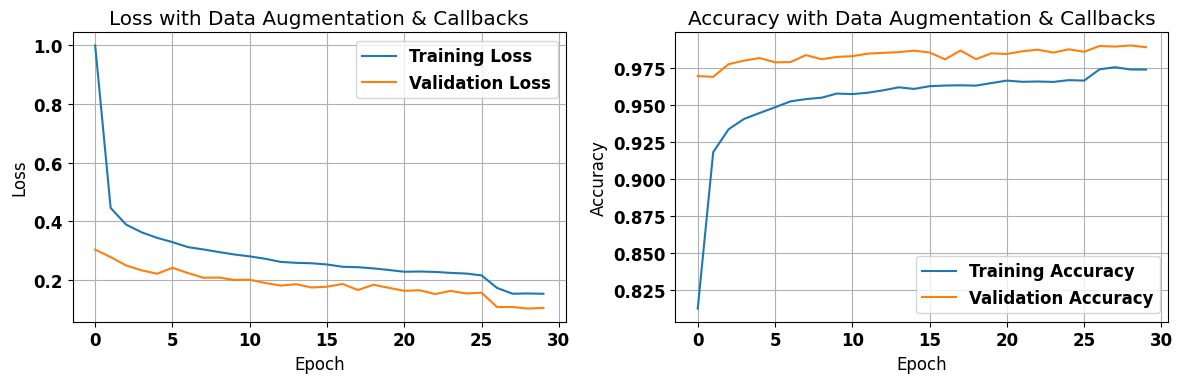

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['loss'], label='Training Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Loss with Data Augmentation & Callbacks')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy with Data Augmentation & Callbacks')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


🧪 Test Loss: 0.0918
✅ Test Accuracy: 0.9937
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


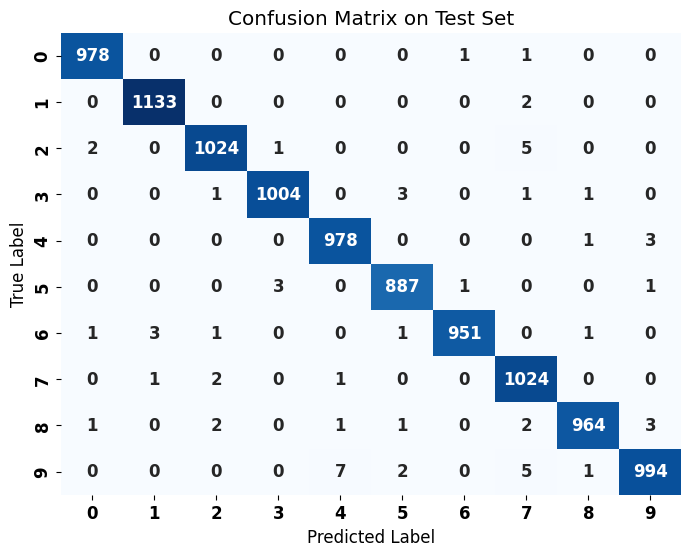


📋 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



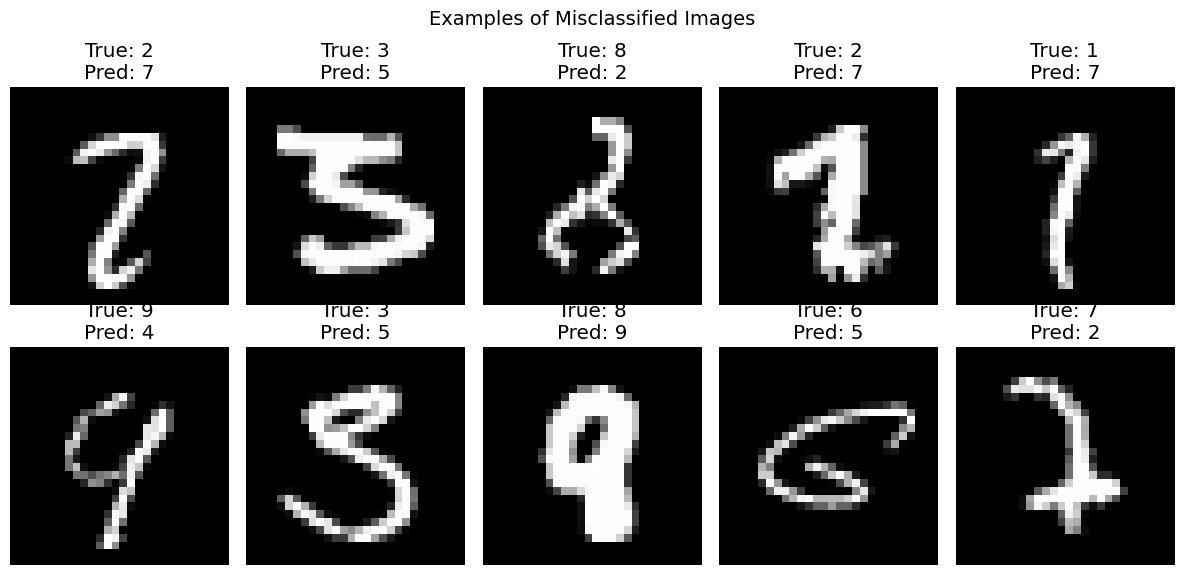


📉 Final learning rate: 0.000500


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🧪 Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# 2. Prédictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 3. Matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test Set")
plt.show()

# 4. Rapport de classification
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

# 5. Visualisation d’erreurs : images mal classées
errors = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(errors[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis("off")
plt.suptitle("Examples of Misclassified Images", fontsize=14)
plt.tight_layout()
plt.show()

# 6. Affichage du learning rate final
lr_final = model.optimizer.learning_rate.numpy() if not hasattr(model.optimizer, 'lr') else model.optimizer.lr.numpy()
print(f"\n📉 Final learning rate: {lr_final:.6f}")
